# Polarization Ellipses

**Scott Prahl**

*March 2020*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pypolar.jones as jones
import pypolar.visualization as vis

np.set_printoptions(suppress=True)  # print 1e-16 as zero

## Introduction

Polarized light in its most general form is called elliptical because when the electric field is projected onto the $z = 0$ plane it will trace out an ellipse.  This projection is called a **sectional pattern**.  

The generally accepted convention is that one views the sectional plane by looking along the $z$-axis towards the source. Complete details of the assumptions can be found in [Jupyter notebook on Conventions](./02-Jones-Conventions.html)

This notebook examines this ellipse.  An ellipse is characterized by its semi-major axis $a$ and its semi-minor axis $b$.  If the ellipse is not tilted, then the semi-major axis coincides with the $x$-axis and therefore $a=E_{x0}$ and $b=E_{y0}$.  

When the ellipse is rotated at an angle $\alpha$ from the $x$-axis this angle is called the **azimuth** of the ellipse.

The **ellipticity** of the ellipse is just $b/a$.  The **ellipticity angle** is $\beta$ and is related to the ellipticity by $b/a=\tan\beta$.

Another angle of interest is the related to the ratio of the field amplitudes $E_{0y}/E_{0x} = \tan\epsilon$.  

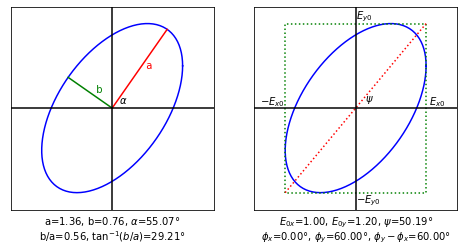

In [5]:
phi=np.pi/3
v = np.array([1,1.2*np.exp(phi*1j)])
vis.draw_jones_ellipse(v)
plt.show()

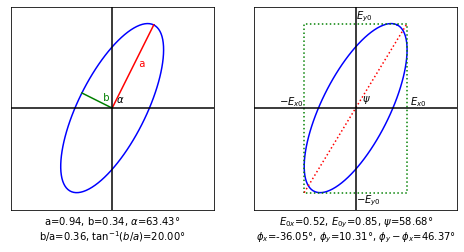

In [6]:
v = jones.field_elliptical(np.arctan(2),np.radians(20))
vis.draw_jones_ellipse(v)
plt.show()

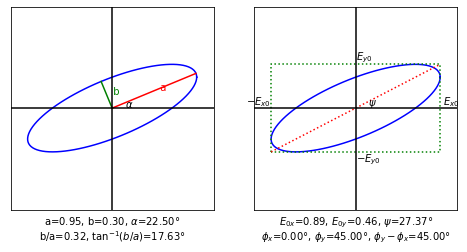

In [7]:
v = 0.325*np.array([2.732,1+1j])
vis.draw_jones_ellipse(v)
plt.show()

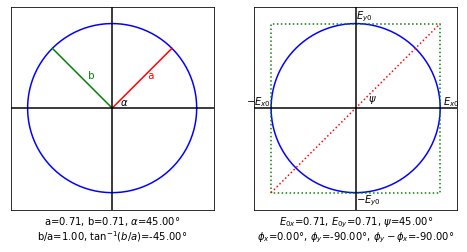

Jones vector for left circular polarization
     [0.70710678+0.j         0.        -0.70710678j]

        pypolar expected
E_x0     0.707    0.707
E_y0     0.707    0.707
psi       45.0°   45.00° arctan(Ey0/Ex0)
phase   -90.00°  -90.00° relative

alpha     45.0°    45.0° angle of the semi-major-axis
a        0.707    0.707 semi-major
b        0.707    0.707 semi-minor
b/a       1.00     1.00
beta     -45.0°   -45.0° ellipticity arctan(b/a)


In [11]:
v=jones.field_left_circular()

psi=jones.amplitude_ratio_angle(v)
alpha=jones.ellipse_azimuth(v)
beta=jones.ellipticity_angle(v)
a,b = jones.ellipse_axes(v)
E_x,E_y = np.abs(v)
phase=jones.phase(v)

vis.draw_jones_ellipse(v)
plt.show()

print('Jones vector for left circular polarization')
print('    ',v)
print()
print('        pypolar expected')

print('E_x0    %6.3f   %6.3f' % (E_x,1/np.sqrt(2)))
print('E_y0    %6.3f   %6.3f' % (E_y,1/np.sqrt(2)))
print('psi     %6.1f°  %6.2f° arctan(Ey0/Ex0)' % (np.degrees(psi),45))
print('phase   %6.2f°  %6.2f° relative' % (np.degrees(phase),-90))
print()

print('alpha   %6.1f°  %6.1f° angle of the semi-major-axis' % (np.degrees(alpha),45))
print('a       %6.3f   %6.3f semi-major' % (a,1/np.sqrt(2)))
print('b       %6.3f   %6.3f semi-minor' % (b,1/np.sqrt(2)))
print('b/a     %6.2f   %6.2f' % (b/a,1.0))
print('beta    %6.1f°  %6.1f° ellipticity arctan(b/a)' % (np.degrees(beta),-45))



### Example from Shurcliff 1964, page 28

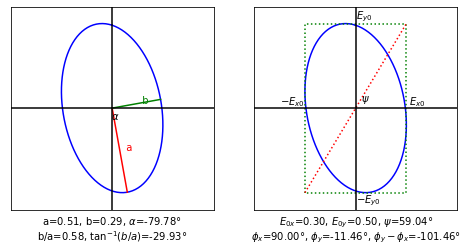

Jones vector
     [0.        +0.3j        0.49003329-0.09933467j]

         pypolar Shurcliff
E_x0         0.3      0.3
E_y0         0.5      0.5
psi         59.0°    59.0° arctan(Ey0/Ex0)
gamma     -101.5°  -101.0° phase difference (phi_y-phi_x)

alpha      -79.8°   -80.0° auxilary angle to major-axis
alpha+90°   10.2°    10.0° auxilary angle to minor-axis
b/a         0.58     0.58 (semi-minor radius)/(semi-major radius)
beta       -29.9°   -30.0° ellipticity arctan(b/a)


In [14]:
v=np.array([0.3*np.exp(1j*np.pi/2),
            0.5*np.exp(-0.2j)])

gamma=jones.phase(v)
psi=jones.amplitude_ratio_angle(v)
alpha=jones.ellipse_azimuth(v)
beta=jones.ellipticity_angle(v)
a,b = jones.ellipse_axes(v)
E_x,E_y = np.abs(v)

vis.draw_jones_ellipse(v)
plt.show()

print('Jones vector')
print('    ',v)
print()
print('         pypolar Shurcliff')

print('E_x0      %6.1f   %6.1f' % (E_x,0.3))
print('E_y0      %6.1f   %6.1f' % (E_y,0.5))
print('psi       %6.1f°  %6.1f° arctan(Ey0/Ex0)' % (np.degrees(psi),59))
print('gamma     %6.1f°  %6.1f° phase difference (phi_y-phi_x)' % (np.degrees(gamma), -101))
print()
print('alpha     %6.1f°  %6.1f° auxilary angle to major-axis' % (np.degrees(alpha),10-90))
print('alpha+90° %6.1f°  %6.1f° auxilary angle to minor-axis' % (90+np.degrees(alpha),10))
print('b/a       %6.2f   %6.2f (semi-minor radius)/(semi-major radius)' % (b/a,0.58))
print('beta      %6.1f°  %6.1f° ellipticity arctan(b/a)' % (np.degrees(beta),-30))

### Problem 5.19 and 5.20 from Hecht, Schuam's Outline of Optics, 1975

Hecht uses $\exp(kz-\omega t)$ and therefore we need to use the alternate convention.  A quick visualization confirms that the E-field rotates counter-clockwise and agres with Hecht that the field is left-handed.

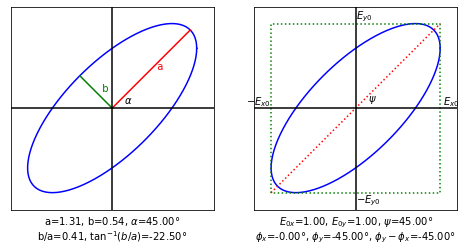

Jones vector
     [1.        +0.j         0.70710678+0.70710678j]

            pypolar   Hecht
alpha          45.0°    45.0°  horizontal to major-axis
a             1.307    1.310  semi-major axis
b             0.541    0.542  semi-minor axis
b/a            0.41     0.41  
ellipticity    22.5°    22.5°  arctan(b/a)

E_x0            1.0      1.0
E_y0            1.0      1.0
psi            45.0°    45.0°  arctan(Ey0/Ex0)
phi_y-phi_x    45.0°    45.0° 


In [15]:
jones.use_alternate_convention(True)

v=np.array([1.0,
            1.0*np.exp(1j*np.pi/4.0)])

vis.draw_jones_ellipse(v)
plt.show()

ani = vis.draw_jones_animated(v,nframes=32)

# The rest of the parameters in Hecht

Delta=jones.phase(v)
psi=jones.amplitude_ratio_angle(v)
alpha=jones.ellipse_azimuth(v)
beta=jones.ellipticity_angle(v)
a,b = jones.ellipse_axes(v)
E_x,E_y = np.abs(v)

jones.use_alternate_convention(False)

print('Jones vector')
print('    ',v)
print()
print('            pypolar   Hecht')

print('alpha        %6.1f°  %6.1f°  horizontal to major-axis' % (np.degrees(alpha),45))
print('a            %6.3f   %6.3f  semi-major axis' % (a,1.31))
print('b            %6.3f   %6.3f  semi-minor axis' % (b,0.542))
print('b/a          %6.2f   %6.2f  ' % (b/a,0.41))
print('ellipticity  %6.1f°  %6.1f°  arctan(b/a)' % (np.degrees(beta),22.5))

print()
print('E_x0         %6.1f   %6.1f' % (E_x,1))
print('E_y0         %6.1f   %6.1f' % (E_y,1))
print('psi          %6.1f°  %6.1f°  arctan(Ey0/Ex0)' % (np.degrees(psi),45))
print('phi_y-phi_x  %6.1f°  %6.1f° ' % (np.degrees(Delta), 45))

ani